In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [5]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page'
page = requests.get(URL) # to get all data on the webpage
page.status_code # to see the operatn succesfull

200

In [6]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.09b0e9.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" si

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.09b0e9.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [8]:
name = soup.find('div', class_ = '_4rR01T')
name

<div class="_4rR01T">vivo V30 5G (Andaman Blue, 256 GB)</div>

In [9]:
name.text

'vivo V30 5G (Andaman Blue, 256 GB)'

In [10]:
price = soup.find('div', class_='_30jeq3 _1_WHN1')

price

<div class="_30jeq3 _1_WHN1">₹37,999</div>

In [11]:
price.text

'₹37,999'

In [12]:
ratings = soup.find('div', class_='_3LWZlK')

ratings.text

'4.3'

In [13]:
specifications = soup.find('div', class_='fMghEO')

specifications.text

'12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full HD+ Display50MP + 50MP | 50MP Front Camera5000 mAh Battery7 Gen 3 Processor1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'

In [14]:
specifications

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">12 GB RAM | 256 GB ROM</li><li class="rgWa7D">17.22 cm (6.78 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 50MP | 50MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">7 Gen 3 Processor</li><li class="rgWa7D">1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories</li></ul></div>

In [15]:
specs = specifications.find('li', class_ = 'rgWa7D')

In [16]:
specs.text

'12 GB RAM | 256 GB ROM'

In [17]:
specs = specifications.find_all('li', class_ = 'rgWa7D' )

specs[1].text

'17.22 cm (6.78 inch) Full HD+ Display'

In [18]:
specs[0].text

'12 GB RAM | 256 GB ROM'

In [19]:
specs[2].text

'50MP + 50MP | 50MP Front Camera'

In [20]:
specs[3].text

'5000 mAh Battery'

In [21]:
specs[4].text

'7 Gen 3 Processor'

In [22]:
# extracting all products on the webpage
product_details = soup.find_all('div', class_ = '_3pLy-c row')

In [23]:
print('Number of products', len(product_details))

Number of products 24


In [24]:
product_details

[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_2tfzpE"><span>Sponsored</span></div><div class="_4rR01T">vivo V30 5G (Andaman Blue, 256 GB)</div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">12 GB RAM | 256 GB ROM</li><li class="rgWa7D">17.22 cm (6.78 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 50MP | 50MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">7 Gen 3 Processor</li><li class="rgWa7D">1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹37,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->42,999</div><div class="_3Ay6Sb"><span>11% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div>,
 <div class="_3pLy-c row"><div class="col col-7

In [25]:
# showing product details one by one
for product in product_details:
    print(product)
    print('='*50)

<div class="_3pLy-c row"><div class="col col-7-12"><div class="_2tfzpE"><span>Sponsored</span></div><div class="_4rR01T">vivo V30 5G (Andaman Blue, 256 GB)</div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">12 GB RAM | 256 GB ROM</li><li class="rgWa7D">17.22 cm (6.78 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 50MP | 50MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">7 Gen 3 Processor</li><li class="rgWa7D">1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹37,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->42,999</div><div class="_3Ay6Sb"><span>11% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div>
<div class="_3pLy-c row"><div class="col col-7-12

In [26]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np

titles = []
prices = []
ratings = []
features = []

for x in range(1, 21):
    start_time = time.time()
    
    URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page={}'.format(x)
    page = requests.get(URL)  # to get all data on the webpage
    soup = BeautifulSoup(page.content, 'html.parser')
    
    product_details = soup.find_all('div', class_='_3pLy-c row')
    
    for product in product_details:
    
        name = product.find('div', class_='_4rR01T')
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)

        price = product.find('div', class_='_30jeq3 _1_WHN1')
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)

        rating = product.find('div', class_='_3LWZlK')
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)

        f = []
        specifications = product.find('div', class_='fMghEO')
        specs = specifications.find_all('li', class_='rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
        
    end_time = time.time()

    print('Page {} completed in {} seconds'.format(x, end_time - start_time))


Page 1 completed in 0.6998944282531738 seconds
Page 2 completed in 0.6642224788665771 seconds
Page 3 completed in 1.4671971797943115 seconds
Page 4 completed in 0.6732370853424072 seconds
Page 5 completed in 1.4292116165161133 seconds
Page 6 completed in 0.9623453617095947 seconds
Page 7 completed in 0.6404459476470947 seconds
Page 8 completed in 0.7960340976715088 seconds
Page 9 completed in 0.6981372833251953 seconds
Page 10 completed in 1.4552114009857178 seconds
Page 11 completed in 22.943541765213013 seconds
Page 12 completed in 0.9698169231414795 seconds
Page 13 completed in 0.9937958717346191 seconds
Page 14 completed in 1.8833658695220947 seconds
Page 15 completed in 3.4982376098632812 seconds
Page 16 completed in 0.6830053329467773 seconds
Page 17 completed in 0.7719230651855469 seconds
Page 18 completed in 0.9226090908050537 seconds
Page 19 completed in 0.6044957637786865 seconds
Page 20 completed in 0.5775701999664307 seconds


In [27]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(features))

480
480
480
480


In [28]:
print(titles[:5])
print('\n')
print(prices[:5])
print('\n')
print(ratings[:5])
print('\n')
features[:5]

['vivo V30 5G (Classic Black, 256 GB)', 'vivo V30 Pro 5G (Andaman Blue, 256 GB)', 'Motorola Edge 40 Neo (Caneel Bay, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'Motorola Edge 40 Neo (Caneel Bay, 256 GB)']


['₹37,999', '₹41,999', '₹22,999', '₹20,980', '₹24,999']


[nan, nan, '4.3', '4.3', '4.3']




[['12 GB RAM | 256 GB ROM',
  '17.22 cm (6.78 inch) Full HD+ Display',
  '50MP + 50MP | 50MP Front Camera',
  '5000 mAh Battery',
  '7 Gen 3 Processor',
  '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'],
 ['8 GB RAM | 256 GB ROM',
  '17.22 cm (6.78 inch) Full HD+ Display',
  '50MP + 50MP + 50MP | 50MP Front Camera',
  '5000 mAh Battery',
  'Dimensity 8200 5G Processor',
  '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'],
 ['8 GB RAM | 128 GB ROM',
  '16.64 cm (6.55 inch) Full HD+ Display',
  '50MP + 13MP | 32MP Front Camera',
  '5000 mAh Battery',
  'Dimensity 7030 Processor',
  '1 Year on Handset and 6 Months on Accessories'],
 ['8 GB RAM | 128 GB ROM',
  '16.71 cm (6.58 inch) Full HD+ Display',
  '50MP + 2MP | 8MP Front Camera',
  '5000 mAh Battery',
  'Mediatek Dimensity 6020 Processor',
  '1 Year of Device & 6 Months for Inbox Accessories'],
 ['12 GB RAM | 256 GB ROM',
  '16.64 cm

In [29]:
# create a dataframe
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'Features'     : features}
df = pd.DataFrame(data)
df.head(10)

,Product_name,Price,Rating,Features
0,"vivo V30 5G (Classic Black, 256 GB)","₹37,999",NaN,"[12 GB RAM | 256 GB ROM, 17.22 cm (6.78 inch) ..."
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)","₹41,999",NaN,"[8 GB RAM | 256 GB ROM, 17.22 cm (6.78 inch) F..."
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)","₹22,999",4.3,"[8 GB RAM | 128 GB ROM, 16.64 cm (6.55 inch) F..."
3,"vivo T2x 5G (Marine Blue, 128 GB)","₹20,980",4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)","₹24,999",4.3,"[12 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) ..."
5,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...","₹20,200",4.4,"[8 GB RAM | 256 GB ROM, 17.07 cm (6.72 inch) D..."
6,"Nothing Phone (2a) 5G (Black, 256 GB)","₹27,999",NaN,"[12 GB RAM | 256 GB ROM, 17.02 cm (6.7 inch) F..."
7,"Motorola Edge 40 Neo (Black Beauty, 256 GB)","₹24,999",4.3,"[12 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) ..."
8,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)","₹20,495",4.4,"[8 GB RAM | 256 GB ROM, 17.07 cm (6.72 inch) D..."
9,"realme 12+ 5G (Pioneer Green, 256 GB)","₹21,999",4.3,"[8 GB RAM | 256 GB ROM | Expandable Upto 2 TB,..."


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  480 non-null    object
 1   Price         480 non-null    object
 2   Rating        410 non-null    object
 3   Features      480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


In [31]:
df.to_csv('Flipkart_phones1.csv')

### Data Cleaning preparation

In [32]:
# Converting rating to float
df.Rating = df.Rating.astype(float)

# Converting price to float
df.Price = df.Price.apply(lambda s : float(s.replace('₹','').replace(',','')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        410 non-null    float64
 3   Features      480 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.1+ KB


In [33]:
#converting rating to float
df.Rating = df.Rating.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        410 non-null    float64
 3   Features      480 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.1+ KB


In [34]:
df.head()

,Product_name,Price,Rating,Features
0,"vivo V30 5G (Classic Black, 256 GB)",37999.0,NaN,"[12 GB RAM | 256 GB ROM, 17.22 cm (6.78 inch) ..."
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)",41999.0,NaN,"[8 GB RAM | 256 GB ROM, 17.22 cm (6.78 inch) F..."
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"[8 GB RAM | 128 GB ROM, 16.64 cm (6.55 inch) F..."
3,"vivo T2x 5G (Marine Blue, 128 GB)",20980.0,4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"[12 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) ..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        410 non-null    float64
 3   Features      480 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.1+ KB


In [36]:
# convert the feature in string(to work with regular expressions)
df.Features = df.Features.apply(lambda x: ','.join(x))
df.head()

,Product_name,Price,Rating,Features
0,"vivo V30 5G (Classic Black, 256 GB)",37999.0,NaN,"12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Fu..."
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)",41999.0,NaN,"8 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Ful..."
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful..."
3,"vivo T2x 5G (Marine Blue, 128 GB)",20980.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful..."
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu..."


In [37]:
# to extract processor
df.Features[0]

'12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Full HD+ Display,50MP + 50MP | 50MP Front Camera,5000 mAh Battery,7 Gen 3 Processor,1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'

In [38]:
def get_ram(text): 
    ram_regex = re.compile('([A-Za-z0-9\s]+)RAM')
    ram = ram_regex.findall(text)
    if len(ram) == 0:
        return np.nan
    else:
        return ram[0].strip()
get_ram(df.Features[0])

'12 GB'

In [39]:
df['RAM'] = df.Features.apply(get_ram)
df.head()

,Product_name,Price,Rating,Features,RAM
0,"vivo V30 5G (Classic Black, 256 GB)",37999.0,NaN,"12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Fu...",12 GB
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)",41999.0,NaN,"8 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Ful...",8 GB
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB
3,"vivo T2x 5G (Marine Blue, 128 GB)",20980.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",8 GB
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB


In [40]:
df['RAM']

0      12 GB
1       8 GB
2       8 GB
3       8 GB
4      12 GB
       ...  
475      NaN
476      NaN
477     8 GB
478      NaN
479     8 GB
Name: RAM, Length: 480, dtype: object

In [41]:
def get_rom(text): 
    rom_regex = re.compile('([A-Za-z0-9\s]+)ROM')
    rom = rom_regex.findall(text)
    if len(rom) == 0:
        return np.nan
    else:
        return rom[0].strip()
get_rom(df.Features[0])

'256 GB'

In [42]:
df['RoM'] = df.Features.apply(get_rom)
df.head()


,Product_name,Price,Rating,Features,RAM,RoM
0,"vivo V30 5G (Classic Black, 256 GB)",37999.0,NaN,"12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Fu...",12 GB,256 GB
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)",41999.0,NaN,"8 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Ful...",8 GB,256 GB
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB
3,"vivo T2x 5G (Marine Blue, 128 GB)",20980.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",8 GB,128 GB
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB


In [43]:
df.Features[0]

'12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Full HD+ Display,50MP + 50MP | 50MP Front Camera,5000 mAh Battery,7 Gen 3 Processor,1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'

In [44]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM
0,"vivo V30 5G (Classic Black, 256 GB)",37999.0,NaN,"12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Fu...",12 GB,256 GB
1,"vivo V30 Pro 5G (Andaman Blue, 256 GB)",41999.0,NaN,"8 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Ful...",8 GB,256 GB
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB
3,"vivo T2x 5G (Marine Blue, 128 GB)",20980.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",8 GB,128 GB
4,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB


In [45]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'RoM'], dtype='object')

In [46]:
df['Features'][0]

'12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Full HD+ Display,50MP + 50MP | 50MP Front Camera,5000 mAh Battery,7 Gen 3 Processor,1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'

In [50]:

# Assuming you have a DataFrame df with a column 'Features'

# Split the 'Features' column by comma
features_list = df['Features'][0].split(',')

# Extract the last value
last_value = features_list[-1]

# Print or use the last value as needed
print(last_value)


Domestic Warranty of 12 months on phone & 6 months on accessories


In [51]:

def get_Phone(text): 
    Phone_regex = re.compile('([\d\sA-Za-z]+?Warranty for Phone)')
    Phone = Phone_regex.findall(text)
    if len(Phone) == 0:
        return np.nan
    else:
        return Phone[0].strip()

result = get_Phone("1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories")
print(result)


1 Year Warranty for Phone


In [52]:
df['Phone_warranty'] = df.Features.apply(get_Phone)
df.head()


,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN


In [53]:


def get_accessories(text): 
    accessories_regex = re.compile('and (.+)')
    accessories       = accessories_regex.findall(text)
    if len( accessories ) == 0:
        return np.nan
    else:
        return  accessories[0].strip()

result = get_accessories("1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories")
print(result)


6 Months Warranty for In-Box Accessories


In [55]:
df['Accesories_warranty'] = df.Features.apply(get_accessories)
df.head()


,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN


In [56]:
df['Features'][0]

'8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 months on accessories'

In [57]:
def get_size(text): 
    size_regex = re.compile('([\d.\d\s]+)cm')
    size = size_regex.findall(text)
    if len(size) == 0:
        return np.nan
    else:
        return size[0].strip()
get_size(df.Features[0])

'17.07'

In [58]:
df['Size in cm'] = df.Features.apply(get_size)

In [59]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07


In [60]:
df['Features'][0]

'8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 months on accessories'

In [61]:
def get_display(text):
    regex = re.compile(r'\((.*?)\) ([A-Za-z0-9\s\+]+) Display')
    display_match = regex.search(text)

    if display_match:
        display_info = display_match.group(0)
        return display_info.replace("'", "").replace('"', '')  
    else:
        return np.nan
get_display(df.Features[0])

nan

In [62]:
df['Display'] = df.Features.apply(get_display)

In [63]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm,Display
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN


In [64]:
df['Features'][0]

'8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 months on accessories'

In [67]:
def get_processor(text): 
    processor_regex = re.compile('([A-Za-z0-9\s]+)Processor')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0].strip()
get_processor(df['Features'].iloc[0])

nan

In [68]:
df['Processor'] = df.Features.apply(get_processor)

In [69]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm,Display,Processor
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN


In [71]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm,Display,Processor
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN


In [72]:
df['Features'][0]

'8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 months on accessories'

In [73]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm,Display,Processor
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN


In [74]:
def get_camera(text): 
    camera_regex = re.compile('([A-Za-z0-9\s]+)Camera')
    camera = camera_regex.findall(text)
    if len(camera) == 0:
        return np.nan
    else:
        return camera[0].strip()
get_camera(df['Features'].iloc[0])

'108MP Rear'

In [75]:
df['Camera'] = df.Features.apply(get_camera)

In [76]:
def get_battery(text): 
    battery_regex = re.compile('([A-Za-z0-9\s]+)Battery')
    battery       = battery_regex.findall(text)
    if len(battery) == 0:
        return np.nan
    else:
        return battery[0].strip()
get_battery(df['Features'].iloc[0])

'5000 mAh'

In [77]:
df['Battery'] = df.Features.apply(get_battery)

In [78]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Phone_warranty,Accesories_warranty,Size in cm,Display,Processor,Camera,Battery
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN,108MP Rear,5000 mAh
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,5000 mAh
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,5000 mAh
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,NaN,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,5000 mAh
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,NaN,NaN,17.07,NaN,NaN,108MP Rear,5000 mAh


In [79]:
df.to_csv('Flipkart_phones.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_name         480 non-null    object 
 1   Price                480 non-null    float64
 2   Rating               463 non-null    float64
 3   Features             480 non-null    object 
 4   RAM                  392 non-null    object 
 5   RoM                  480 non-null    object 
 6   Phone_warranty       152 non-null    object 
 7   Accesories_warranty  379 non-null    object 
 8   Size in cm           480 non-null    object 
 9   Display              366 non-null    object 
 10  Processor            405 non-null    object 
 11  Camera               473 non-null    object 
 12  Battery              392 non-null    object 
dtypes: float64(2), object(11)
memory usage: 48.9+ KB


In [84]:
df['Size in cm'] = df['Size in cm'].astype(float)
df['Battery']    = df['Size in cm'].astype(int)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 479
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_name         427 non-null    object 
 1   Price                427 non-null    float64
 2   Rating               427 non-null    float64
 3   Features             427 non-null    object 
 4   RAM                  427 non-null    object 
 5   RoM                  427 non-null    object 
 6   Accesories_warranty  427 non-null    object 
 7   Size in cm           427 non-null    float64
 8   Display              427 non-null    object 
 9   Processor            427 non-null    object 
 10  Camera               427 non-null    object 
 11  Battery              427 non-null    int32  
dtypes: float64(3), int32(1), object(8)
memory usage: 41.7+ KB


In [85]:
df.duplicated().sum()

53

In [86]:
df = df.drop_duplicates( keep ='last')

In [87]:
df.isnull().sum()

Product_name             0
Price                    0
Rating                   2
Features                 0
RAM                     81
RoM                      0
Phone_warranty         286
Accesories_warranty     79
Size in cm               0
Display                102
Processor               67
Camera                   5
Battery                  0
dtype: int64

In [88]:
# 280 null column so drop phone warranty column
df = df.drop(columns=['Phone_warranty'])

In [89]:
df.Rating.replace(np.nan, df.Rating.mean().round(1), inplace = True)
df.RAM.replace(np.nan, df.RAM.mode()[0], inplace = True)
df.Accesories_warranty.replace(np.nan, df.Accesories_warranty.mode()[0], inplace = True)
df.Display.replace(np.nan, df.Display.mode()[0], inplace = True)
df.Processor.replace(np.nan, df.Processor.mode()[0], inplace = True)
df.Camera.replace(np.nan, df.Camera.mode()[0], inplace = True)

In [90]:
df.head()

,Product_name,Price,Rating,Features,RAM,RoM,Accesories_warranty,Size in cm,Display,Processor,Camera,Battery
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",20298.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,6 Months Warranty for In the Box Accessories,17.07,(6.1 inch) Super Retina XDR Display,6 Core Processor,108MP Rear,17
1,"Motorola Edge 40 Neo (Caneel Bay, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,16
2,"Motorola Edge 40 Neo (Caneel Bay, 128 GB)",22999.0,4.3,"8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Ful...",8 GB,128 GB,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,16
3,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",24999.0,4.3,"12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Fu...",12 GB,256 GB,6 Months on Accessories,16.64,(6.55 inch) Full HD+ Display,Dimensity 7030,32MP Front,16
4,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",20495.0,4.4,"8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Dis...",8 GB,256 GB,6 Months Warranty for In the Box Accessories,17.07,(6.1 inch) Super Retina XDR Display,6 Core Processor,108MP Rear,17


In [91]:
df.describe()

,Price,Rating,Size in cm,Battery
count,427.000000,427.000000,427.000000,427.000000
mean,47778.093677,4.374707,16.592529,16.154567
std,34358.286341,0.190667,0.696574,0.836097
min,20000.000000,3.100000,11.940000,11.000000
25%,24999.000000,4.200000,16.260000,16.000000
50%,31999.000000,4.400000,16.940000,16.000000
75%,59999.000000,4.500000,17.020000,17.000000
max,177990.000000,4.800000,19.300000,19.000000


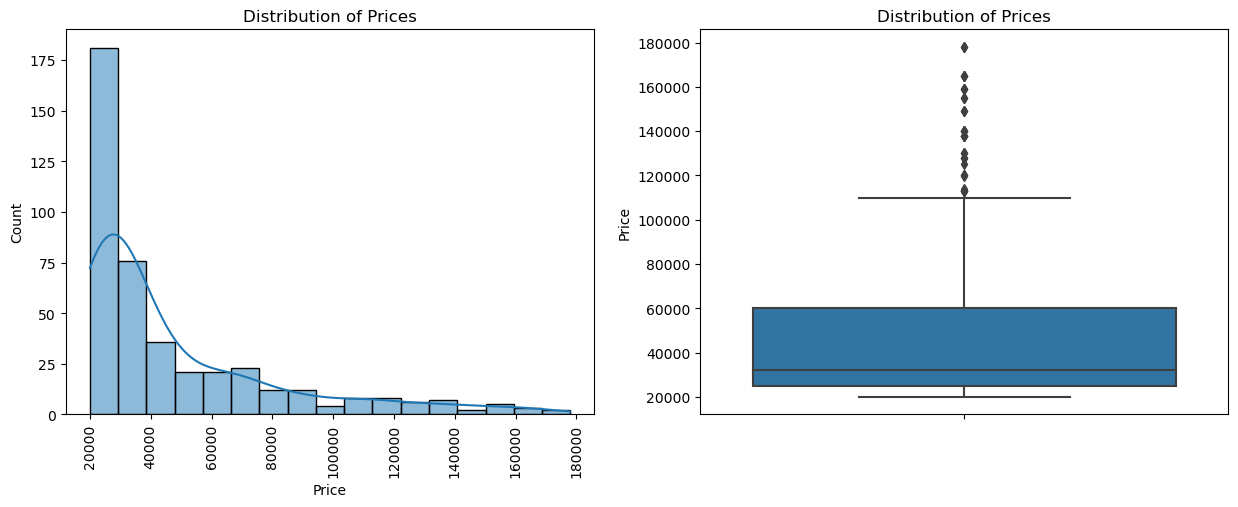

In [128]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()


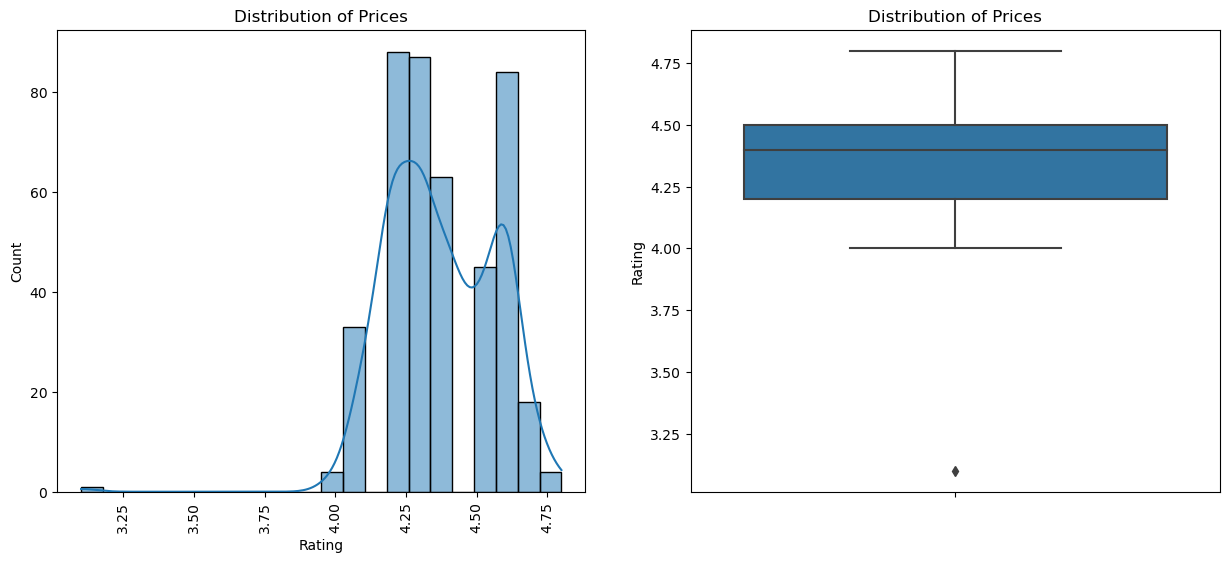

In [129]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rating'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.show()


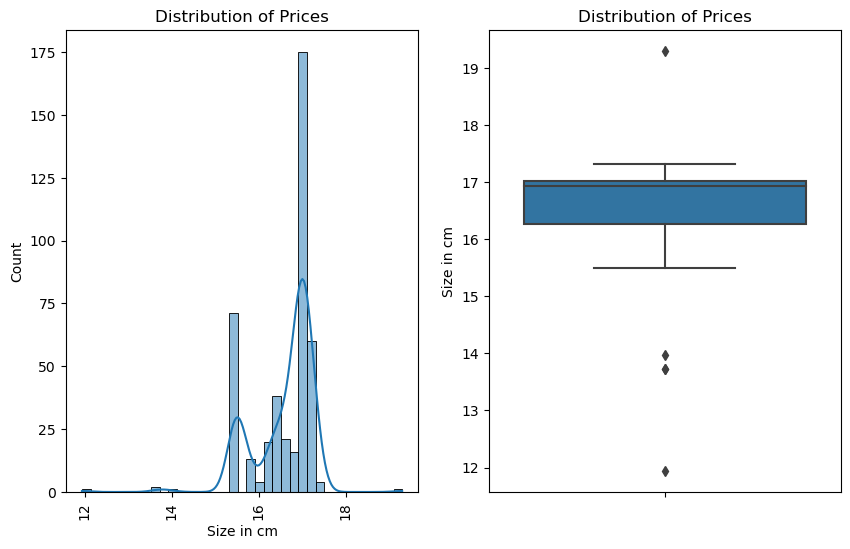

In [130]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Size in cm'], kde=True)
plt.title('Distribution of size')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Size in cm'])
plt.title('Distribution of size')
plt.xticks(rotation=90)

plt.show()


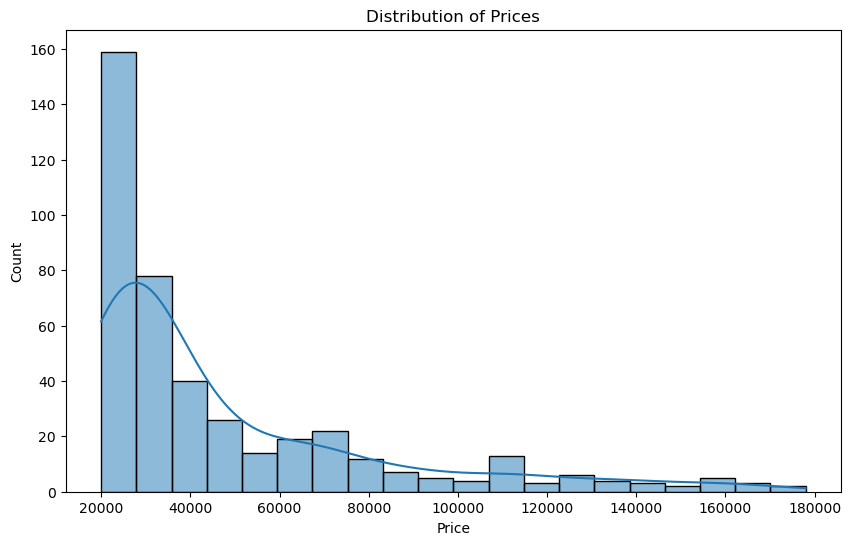

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

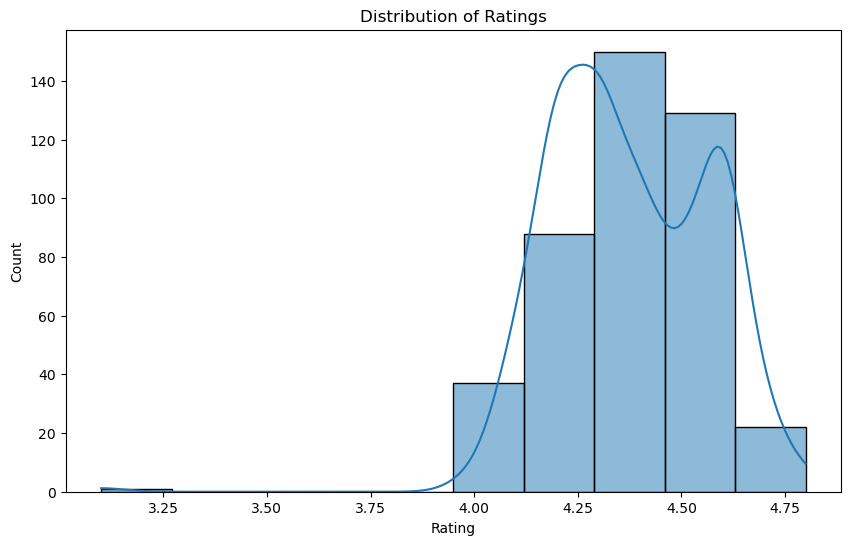

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()

In [102]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'RoM',
       'Accesories_warranty', 'Size in cm', 'Display', 'Processor', 'Camera',
       'Battery'],
      dtype='object')

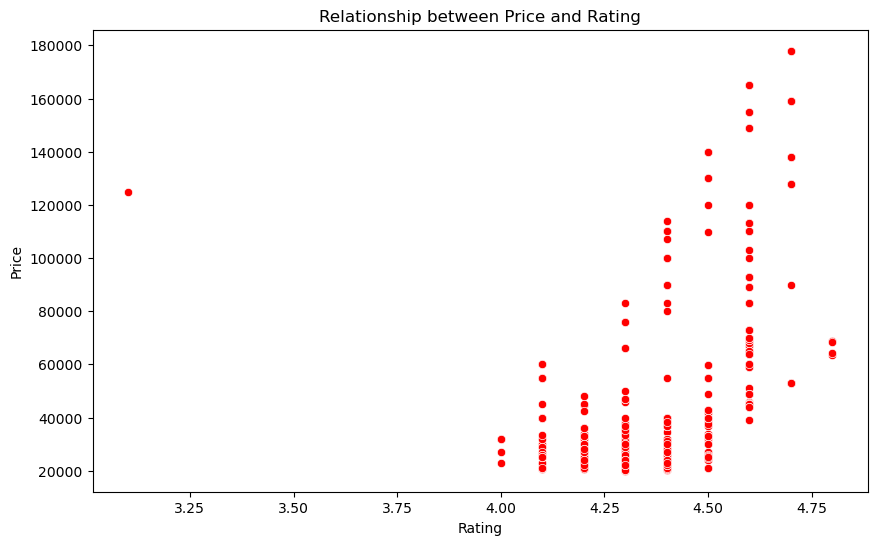

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', data=df, color='Red')
plt.title('Relationship between Price and Rating')
plt.show()

when price increases trating also increases.

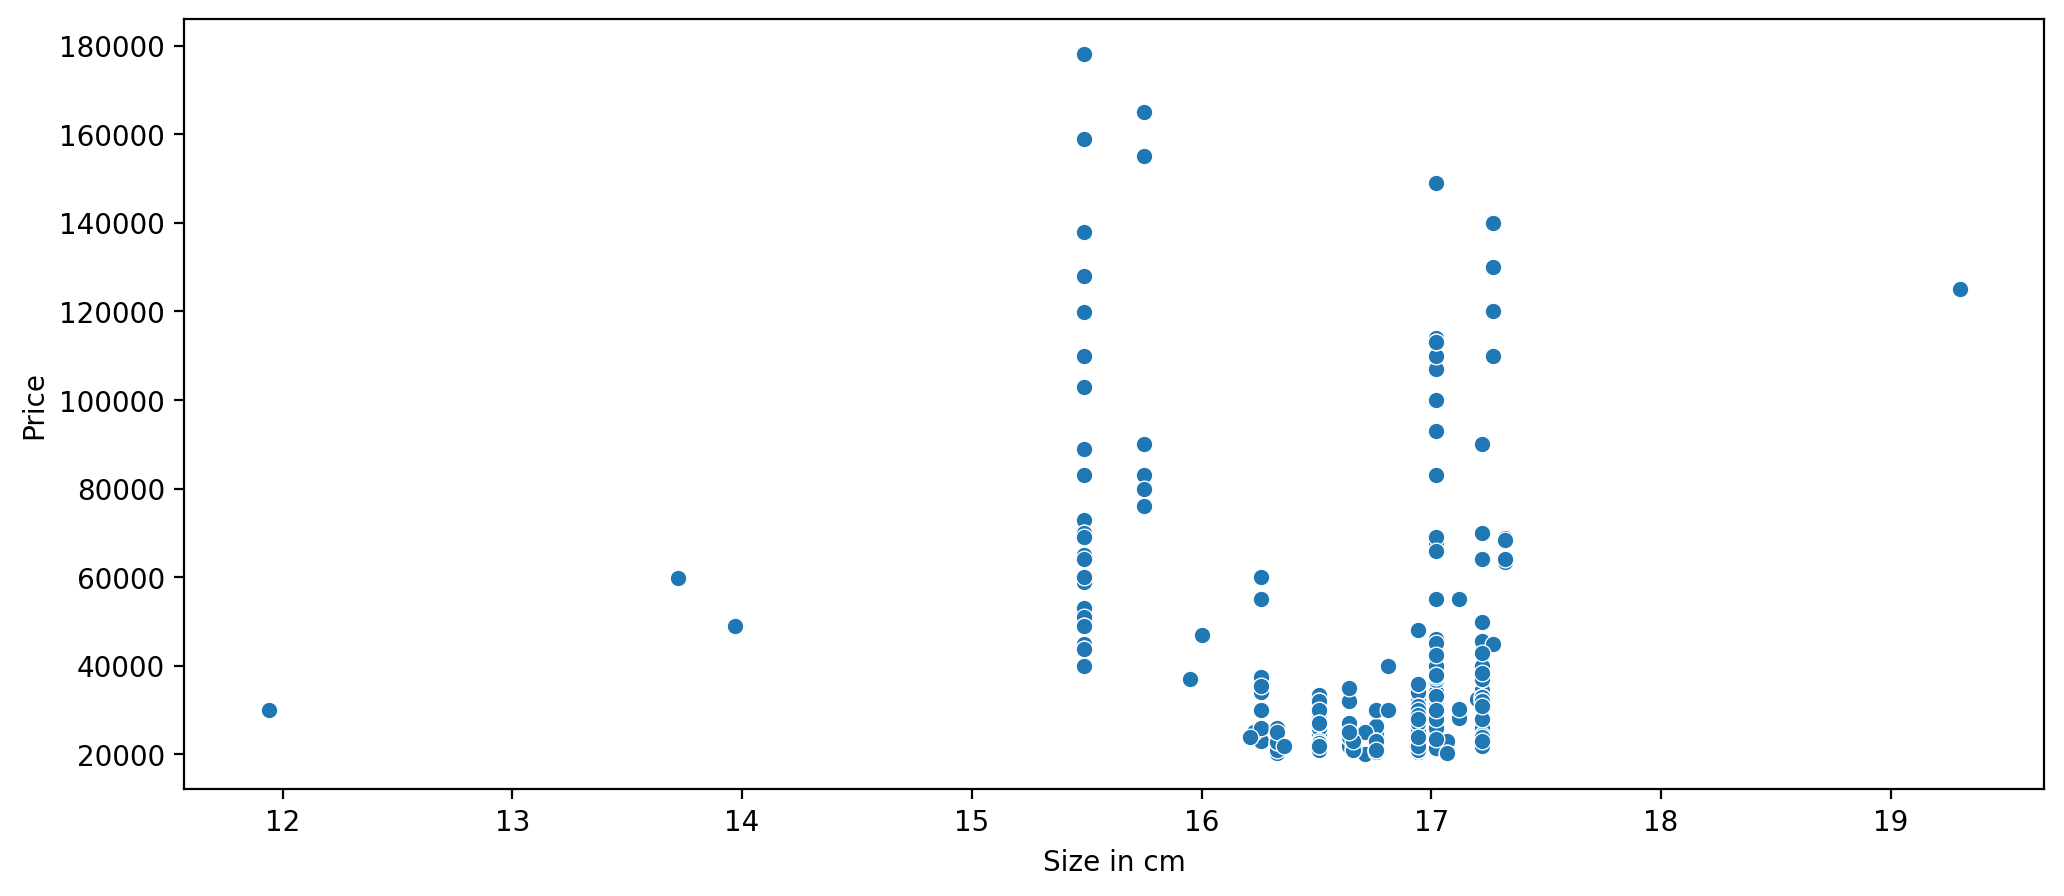

In [108]:
# price vs size
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Price', x=df['Size in cm'], data=df)
plt.show()

Most of the phone size falls between  16 cm to 17 cm even we increase the price . the size remains same.

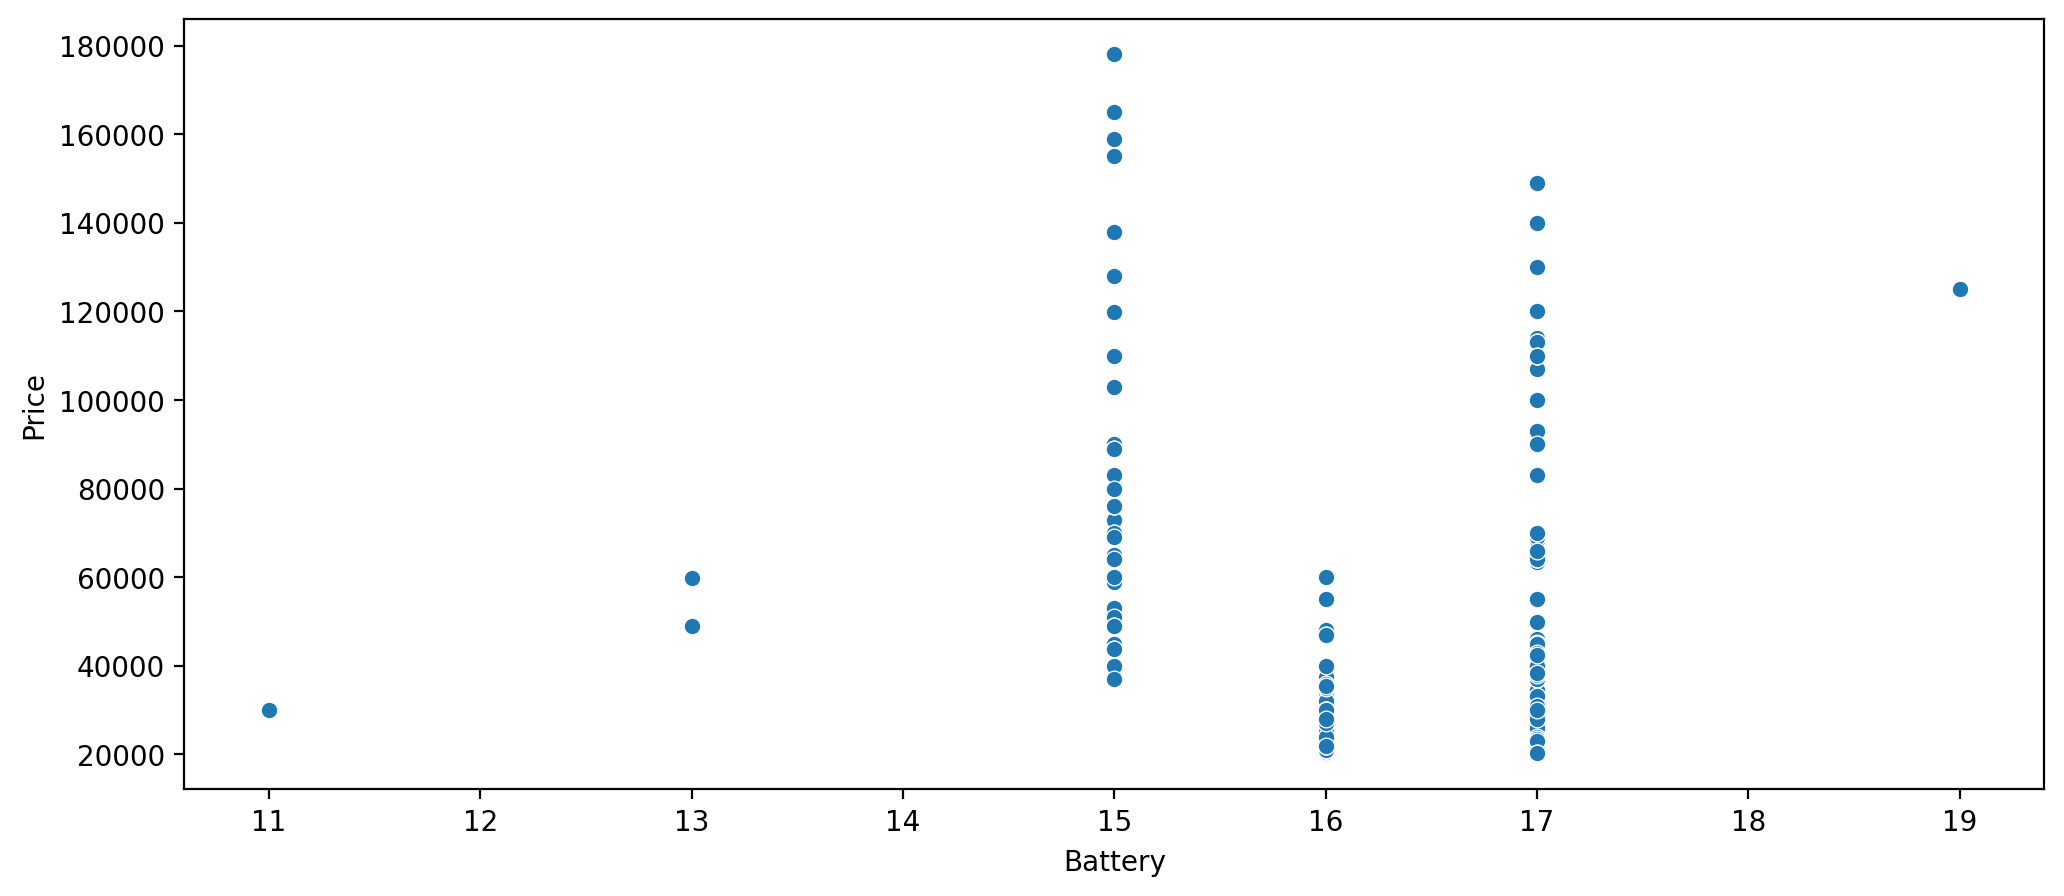

In [113]:
# price vs size
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Price', x=df['Battery'], data=df)
plt.show()

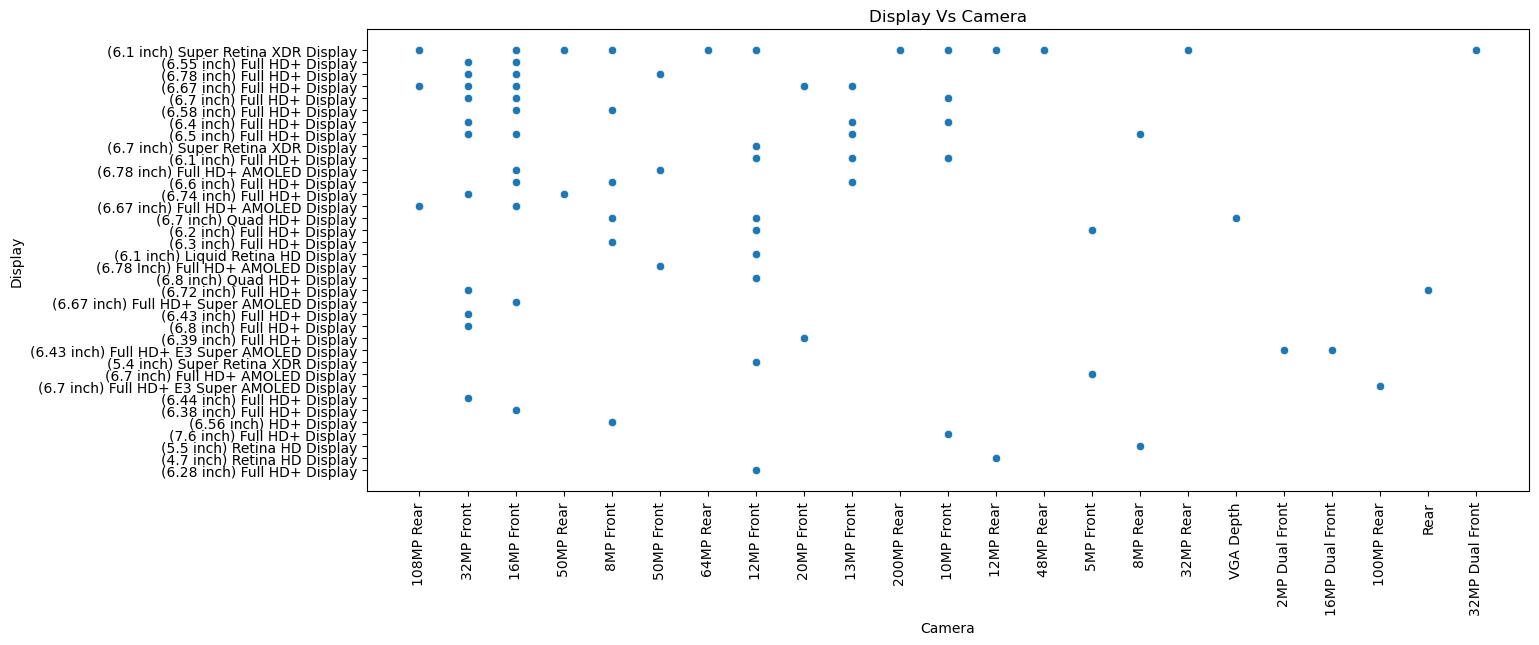

In [147]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Camera', y='Display', data=df)
plt.title('Display Vs Camera')
plt.xticks(rotation=90)
plt.show()

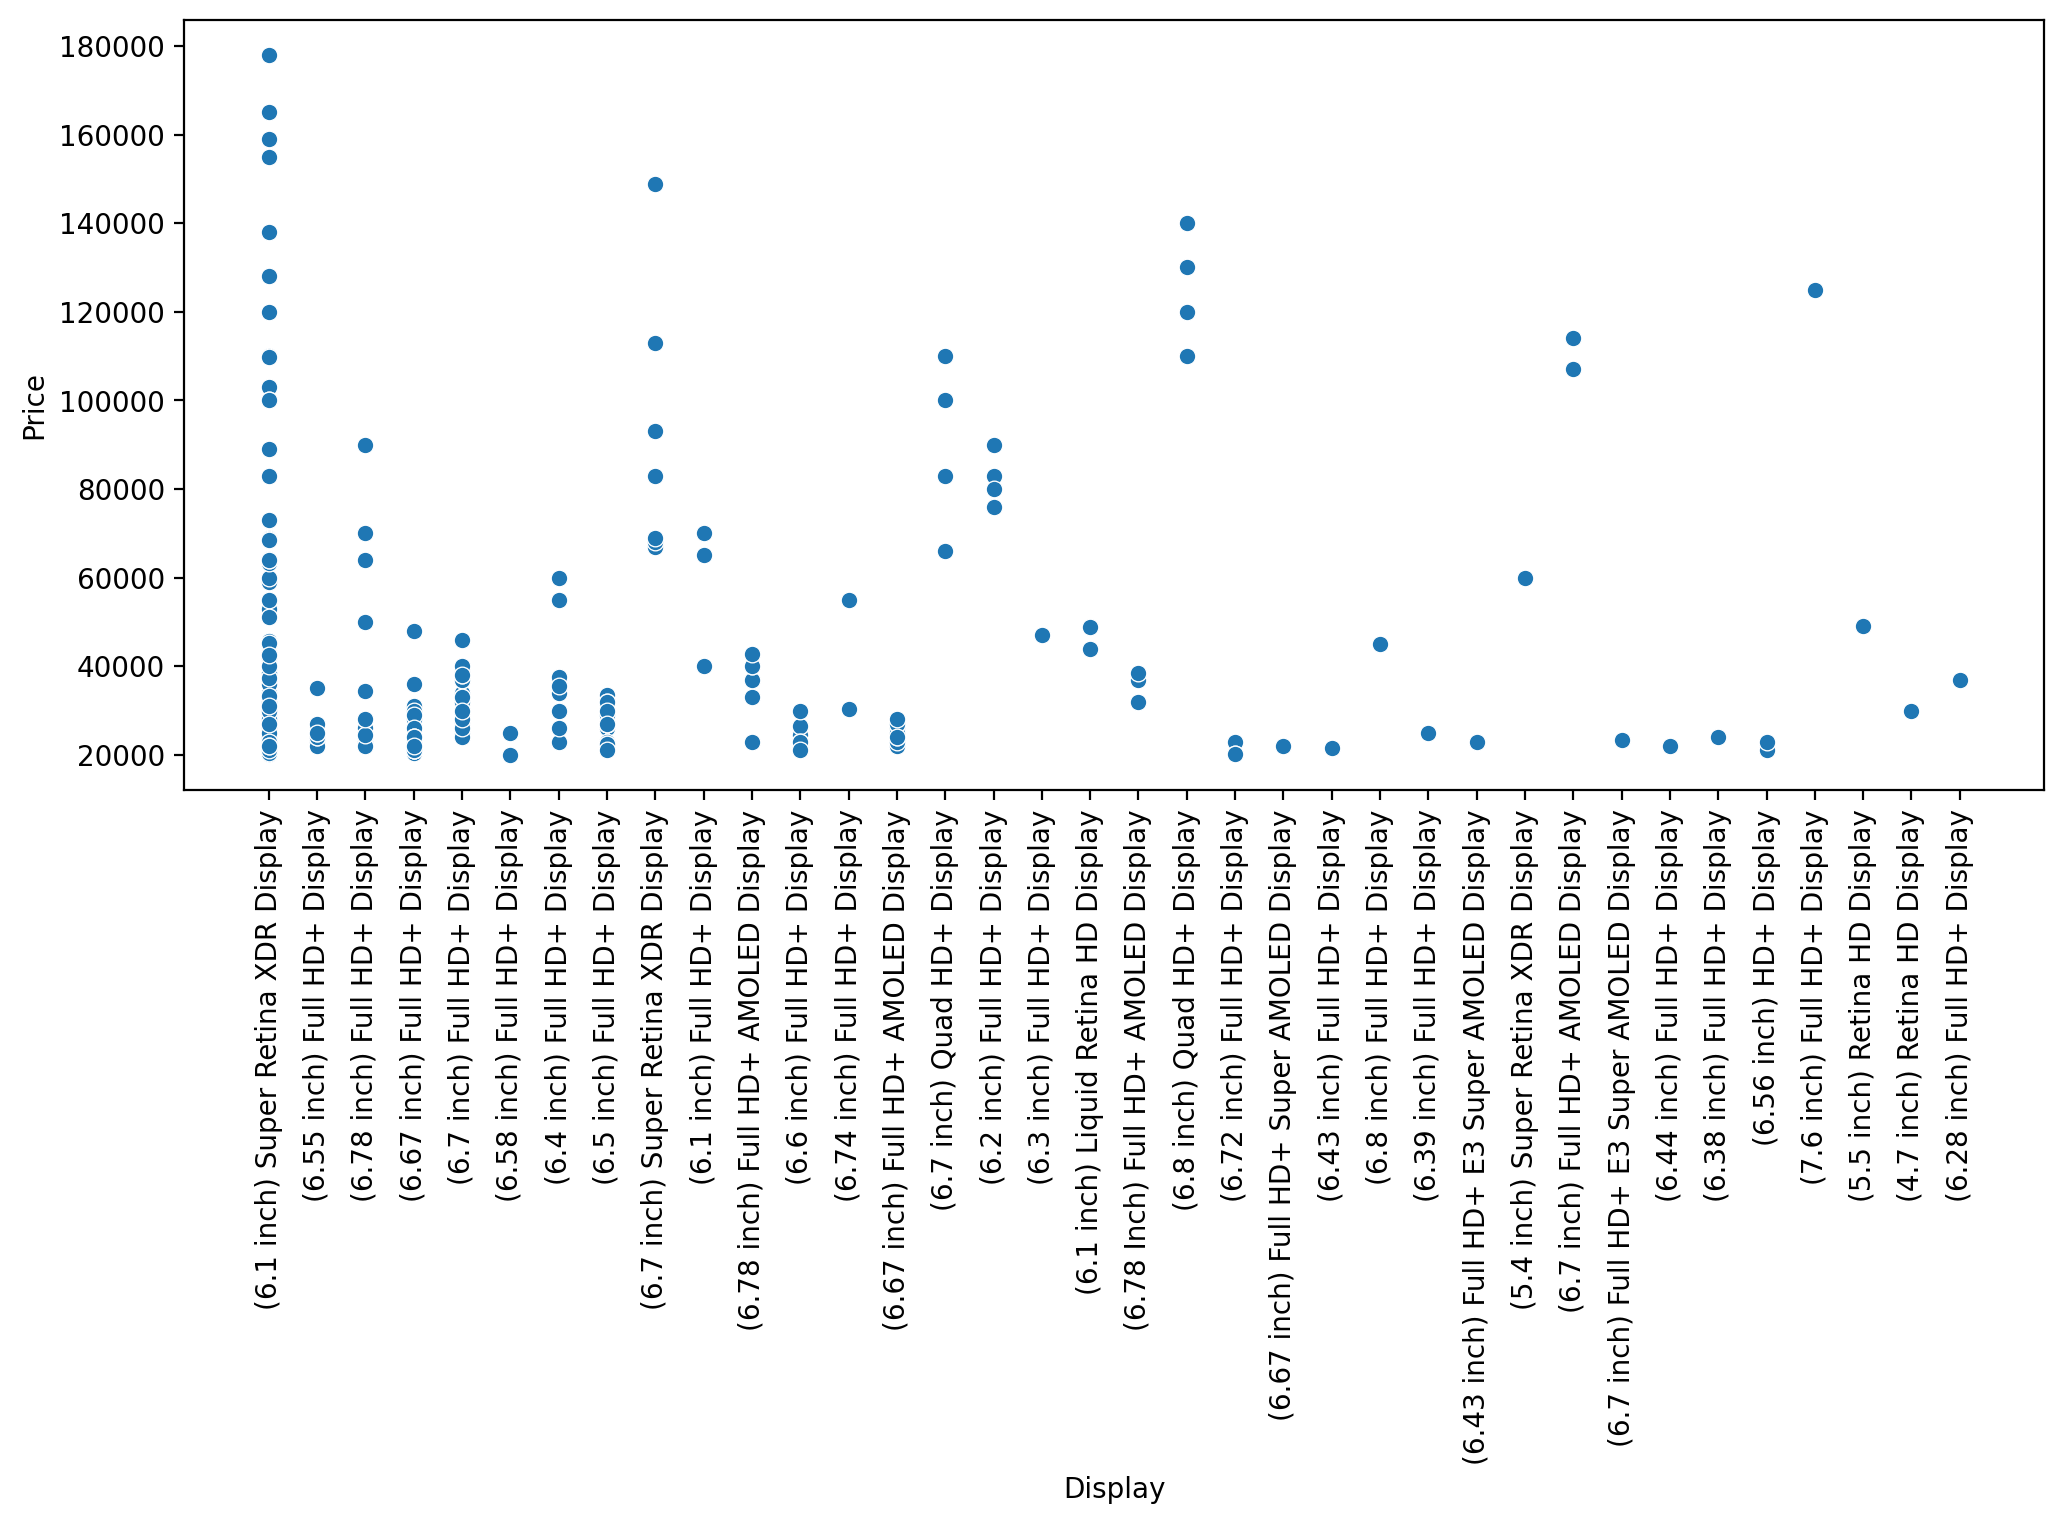

In [149]:
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Price', x=df['Display'], data=df)
plt.xticks(rotation =90)
plt.show()

In [151]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'RoM',
       'Accesories_warranty', 'Size in cm', 'Display', 'Processor', 'Camera',
       'Battery'],
      dtype='object')

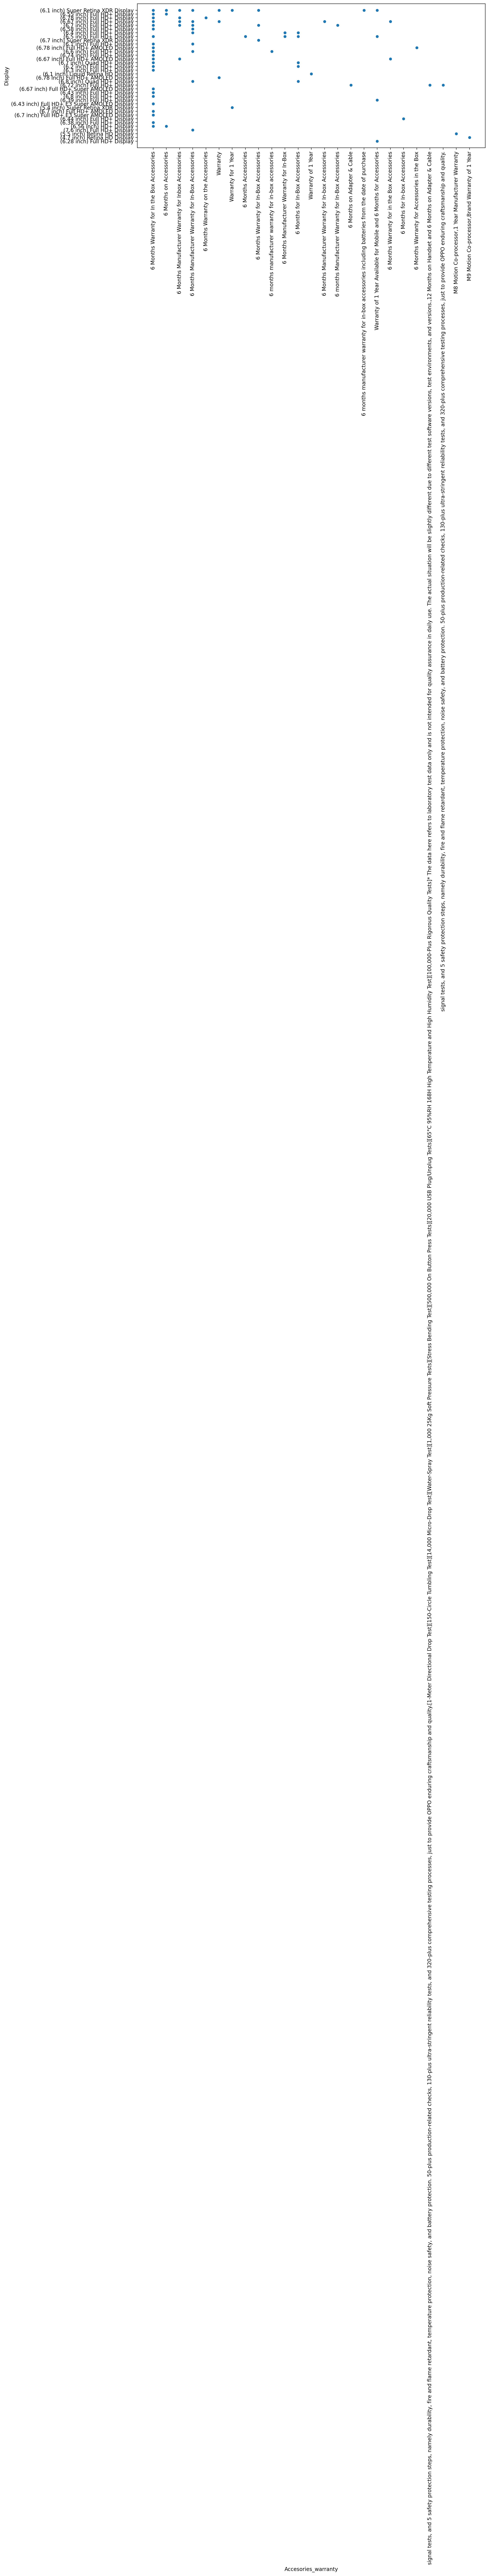

In [153]:
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Display', x=df['Accesories_warranty'], data=df)
plt.xticks(rotation=90)
plt.show()

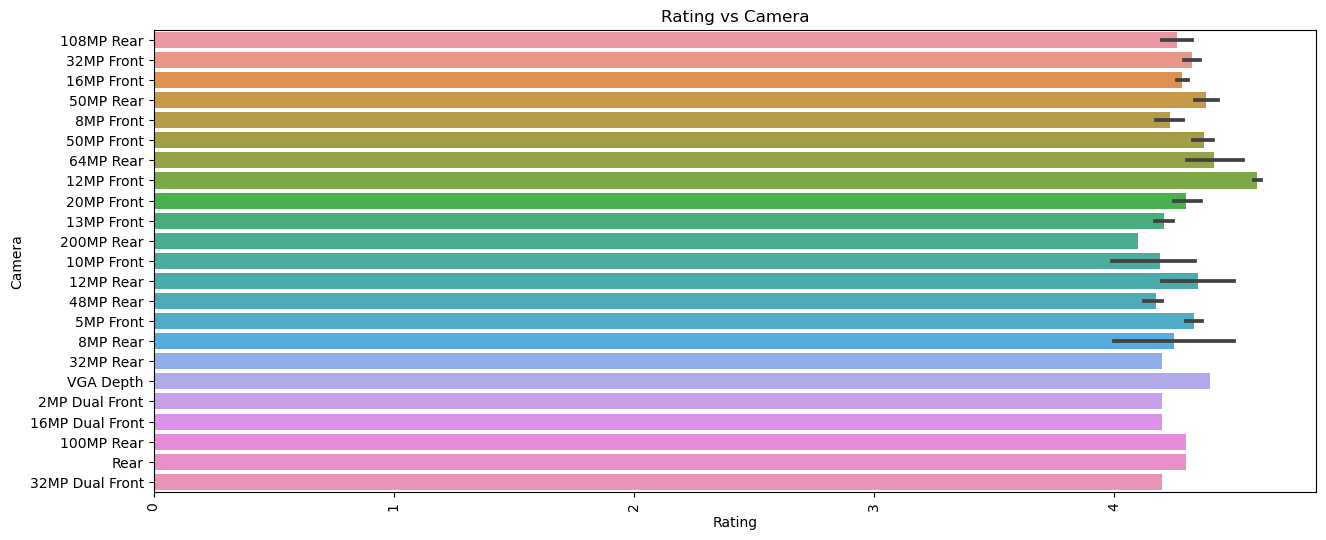

In [139]:
# price vs camera
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Rating'],y='Camera' , data=df)
plt.title('Rating vs Camera')
plt.xticks(rotation =90)
plt.show()


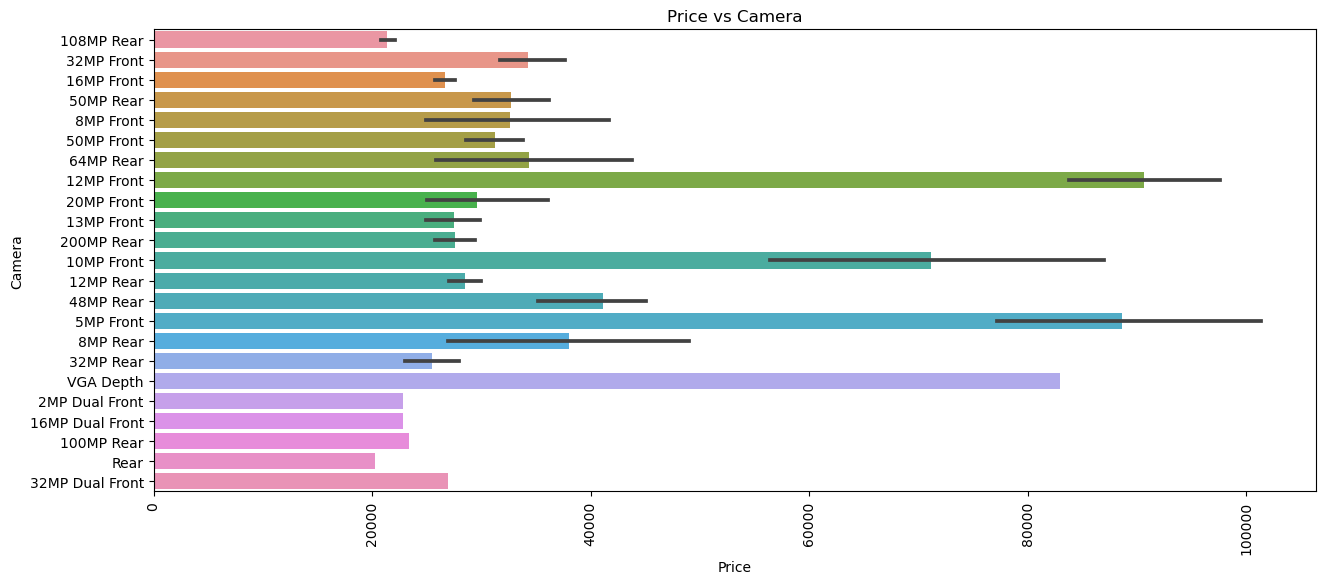

In [140]:
# price vs camera
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Price'],y='Camera' , data=df)
plt.title('Price vs Camera')
plt.xticks(rotation =90)
plt.show()


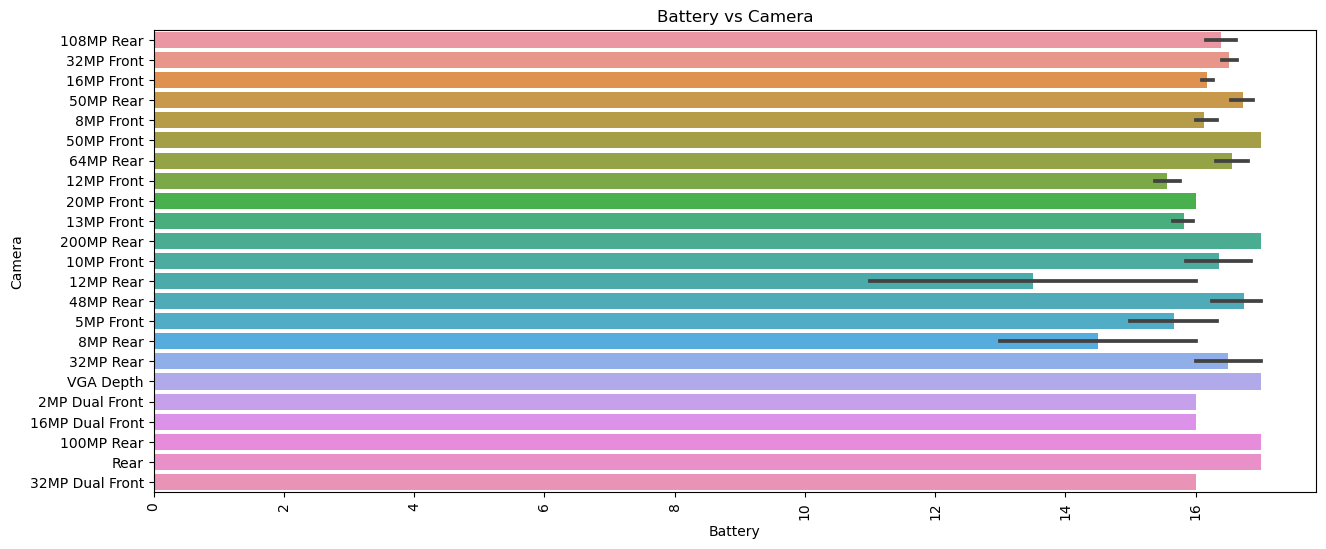

In [142]:
# price vs camera
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Battery'],y='Camera' , data=df)
plt.title('Battery vs Camera')
plt.xticks(rotation =90)
plt.show()


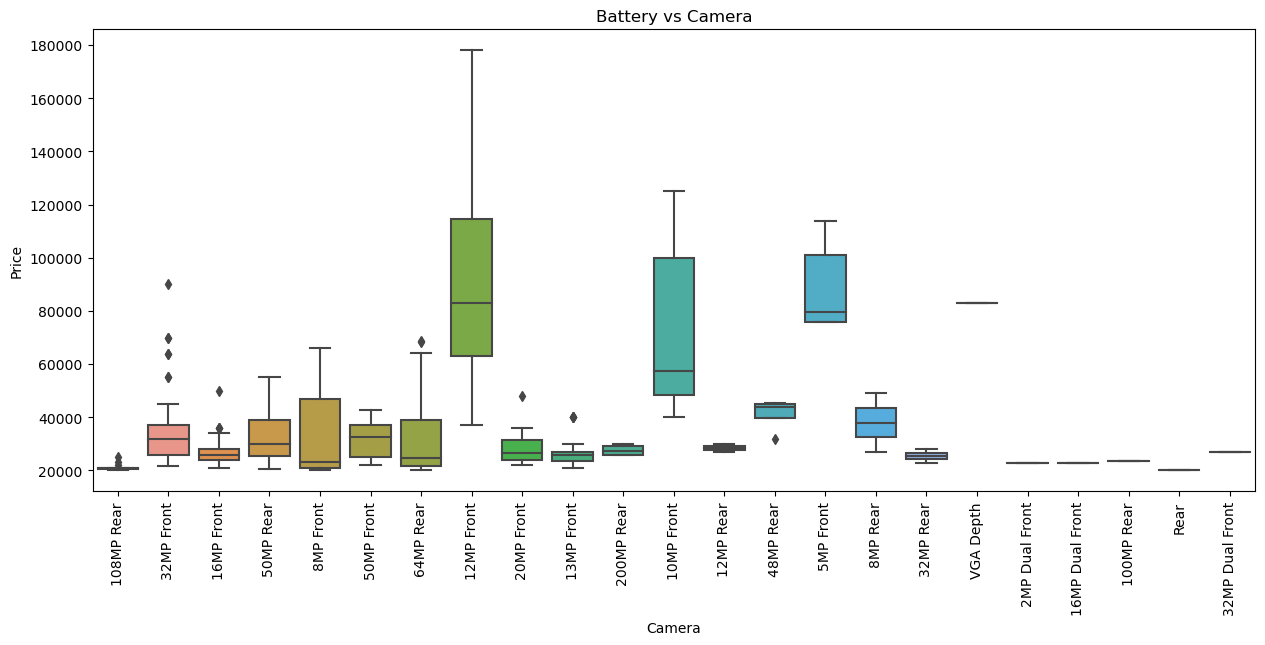

In [144]:
# price vs camera
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['Price'],x='Camera' , data=df)
plt.title('Battery vs Camera')
plt.xticks(rotation =90)
plt.show()


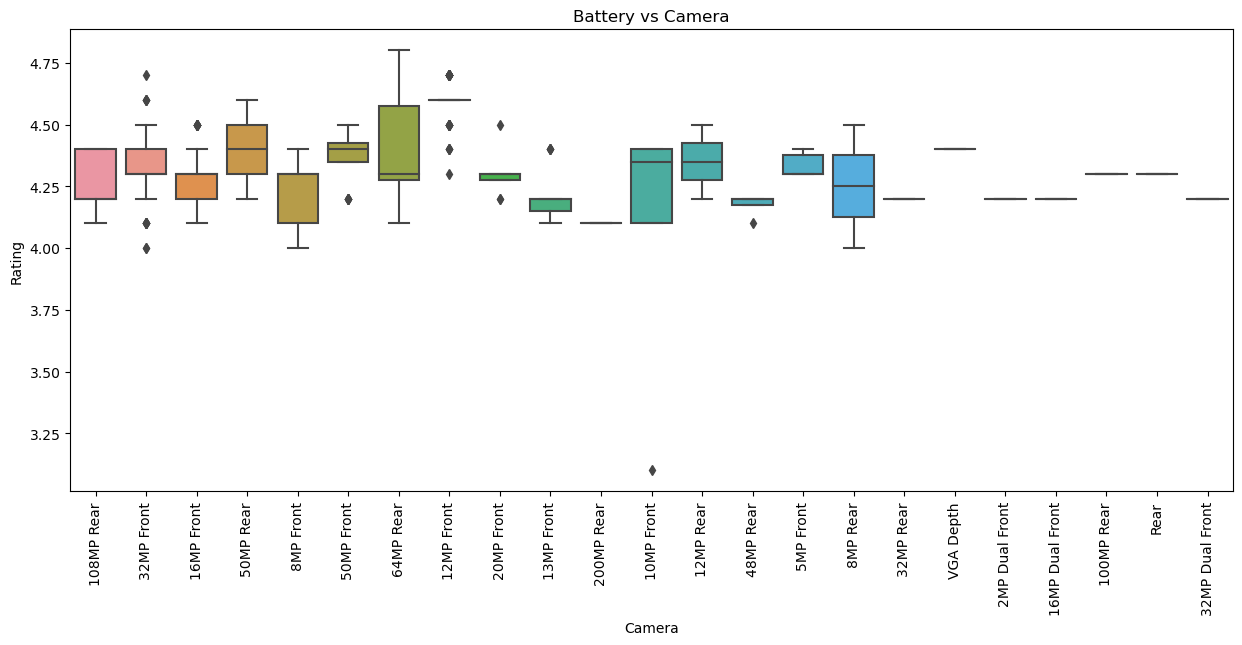

In [145]:
# price vs camera
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['Rating'],x='Camera' , data=df)
plt.title('Battery vs Camera')
plt.xticks(rotation =90)
plt.show()

In [154]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'RoM',
       'Accesories_warranty', 'Size in cm', 'Display', 'Processor', 'Camera',
       'Battery'],
      dtype='object')

<Figure size 2400x1000 with 0 Axes>

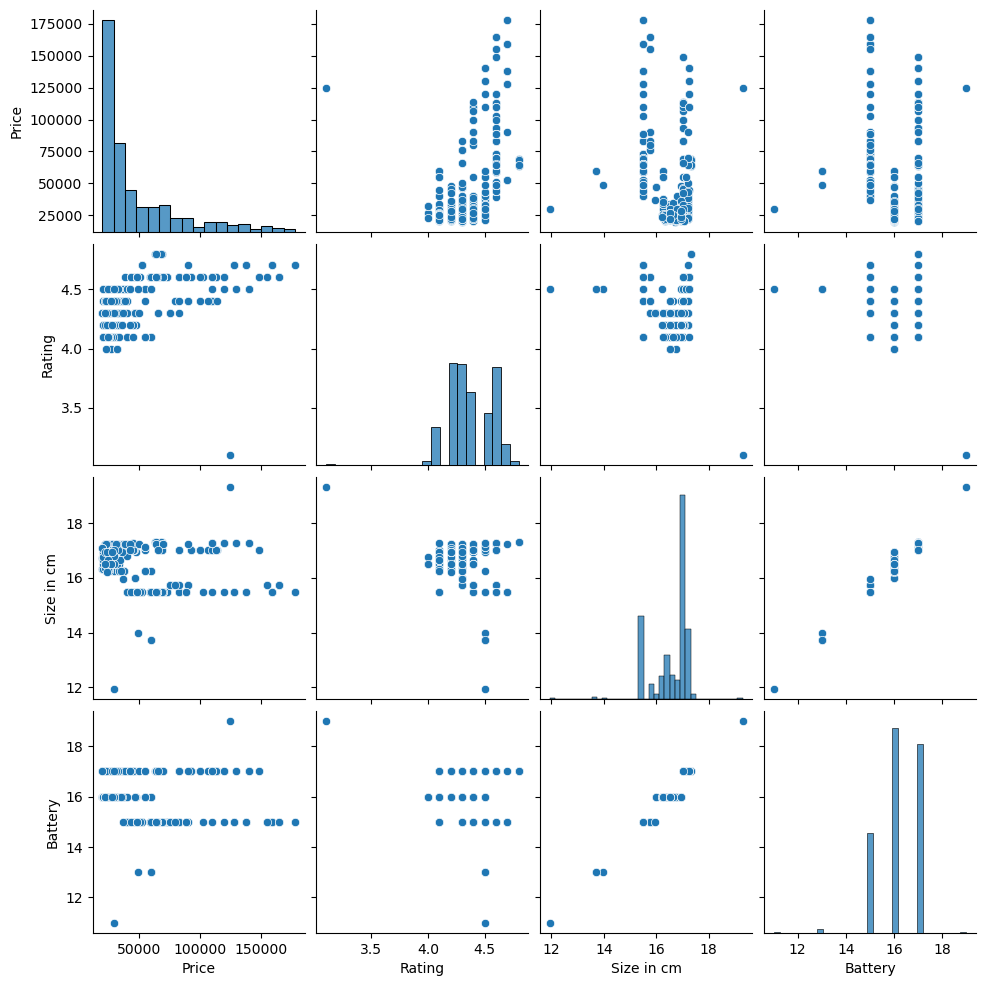

In [118]:
plt.figure(figsize = (12,5), dpi =200)
sns.pairplot(df)
plt.show()

In [110]:
df.corr()

C:\Users\DX\AppData\Local\Temp\ipykernel_9996\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Rating,Size in cm,Battery
Price,1.000000,0.557627,-0.279376,-0.165160
Rating,0.557627,1.000000,-0.338850,-0.174208
Size in cm,-0.279376,-0.338850,1.000000,0.924586
Battery,-0.165160,-0.174208,0.924586,1.000000


C:\Users\DX\AppData\Local\Temp\ipykernel_9996\2444265752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


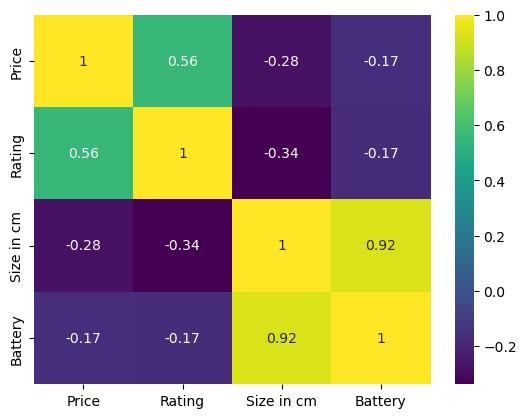

In [112]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()